In [2]:
# Run on CCA
import sys
sys.path.insert(1, '/home/jovyan/home/tools/itk')
sys.path.insert(1, '/home/jovyan/home/tools/abg_python')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from abg_python.snapshot_utils import openSnapshot
from abg_python.cosmo_utils import load_AHF
from itk import inrange, loadpickle, pickle_save_dict, n_array_equal, sync_lim
from numba import njit
from tqdm import tqdm
from glob import glob
from os import path
%matplotlib inline

In [4]:
exec(open('scripts/halo_analysis_scripts.py').read())

In [47]:
def plot_profiles_zbins(allprofiles, ax, profiletype='rho', zbinwidth=0.5, rbins=np.power(10, np.arange(np.log10(0.005258639741921723), np.log10(1.9597976388995666), 0.05)), cmap=plt.cm.Reds, xlabel=False, ylabel=False, z0only=False, model='', pop='-'):
    '''Plots median rho, T, e_CR, P_thermal, or P_CR profile for every redshift bin in `allprofiles`.
    
    Parameters:
        `allprofiles`: output of `profiles_zbins`
        `profiletype`: profile to plot (one of `'rho'`, `'T'`, `'P_th'`, `'e_CR'`, `'P_CR'`)
        `zbinwidth`: width of redshift bins
    '''
    # For each redshift bin, create 2D array where the rows are rho/T/e_CR/P_th/P_CR profiles for every snapshot in bin
    all_profileavgbins = {k:np.array([logprofiles[profiletype] for rmid, logprofiles in profiles_zbin]) for k,profiles_zbin in allprofiles.items()}

    # For each redshift bin, plot median profile
    rmid = (rbins[:-1]+rbins[1:])/2

    for z0, c in zip( sorted(all_profileavgbins.keys()), cmap(np.linspace(0.1,1,len(all_profileavgbins.keys())))[::-1] ):
        if z0only and (z0 > 1.01):
            continue
        profileavgbins_median = np.median(all_profileavgbins[z0], axis=0)
        ax.plot(np.log10(rmid), profileavgbins_median, pop, label=model)
    
    if xlabel:
        ax.set_xlabel(r'$\log (r/R_{vir})$')
    if ylabel:
        ax.set_ylabel( profilelabels[profiletype] )


Computing sim m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1e-4.

Computing sim m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1.

Computing sim m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-6_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom100.

Computing sim m13h206_m3e5_push_alpha10_gacc30_accf1_vw100_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1.

Computing sim m13h206_m3e5_push_alpha10_gacc30_accf1_vw42500_cr1e-6_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1.

Starting h206_HR_sn1dy300ro100ss...


(-1.813121736049652, 7.938046264648437)

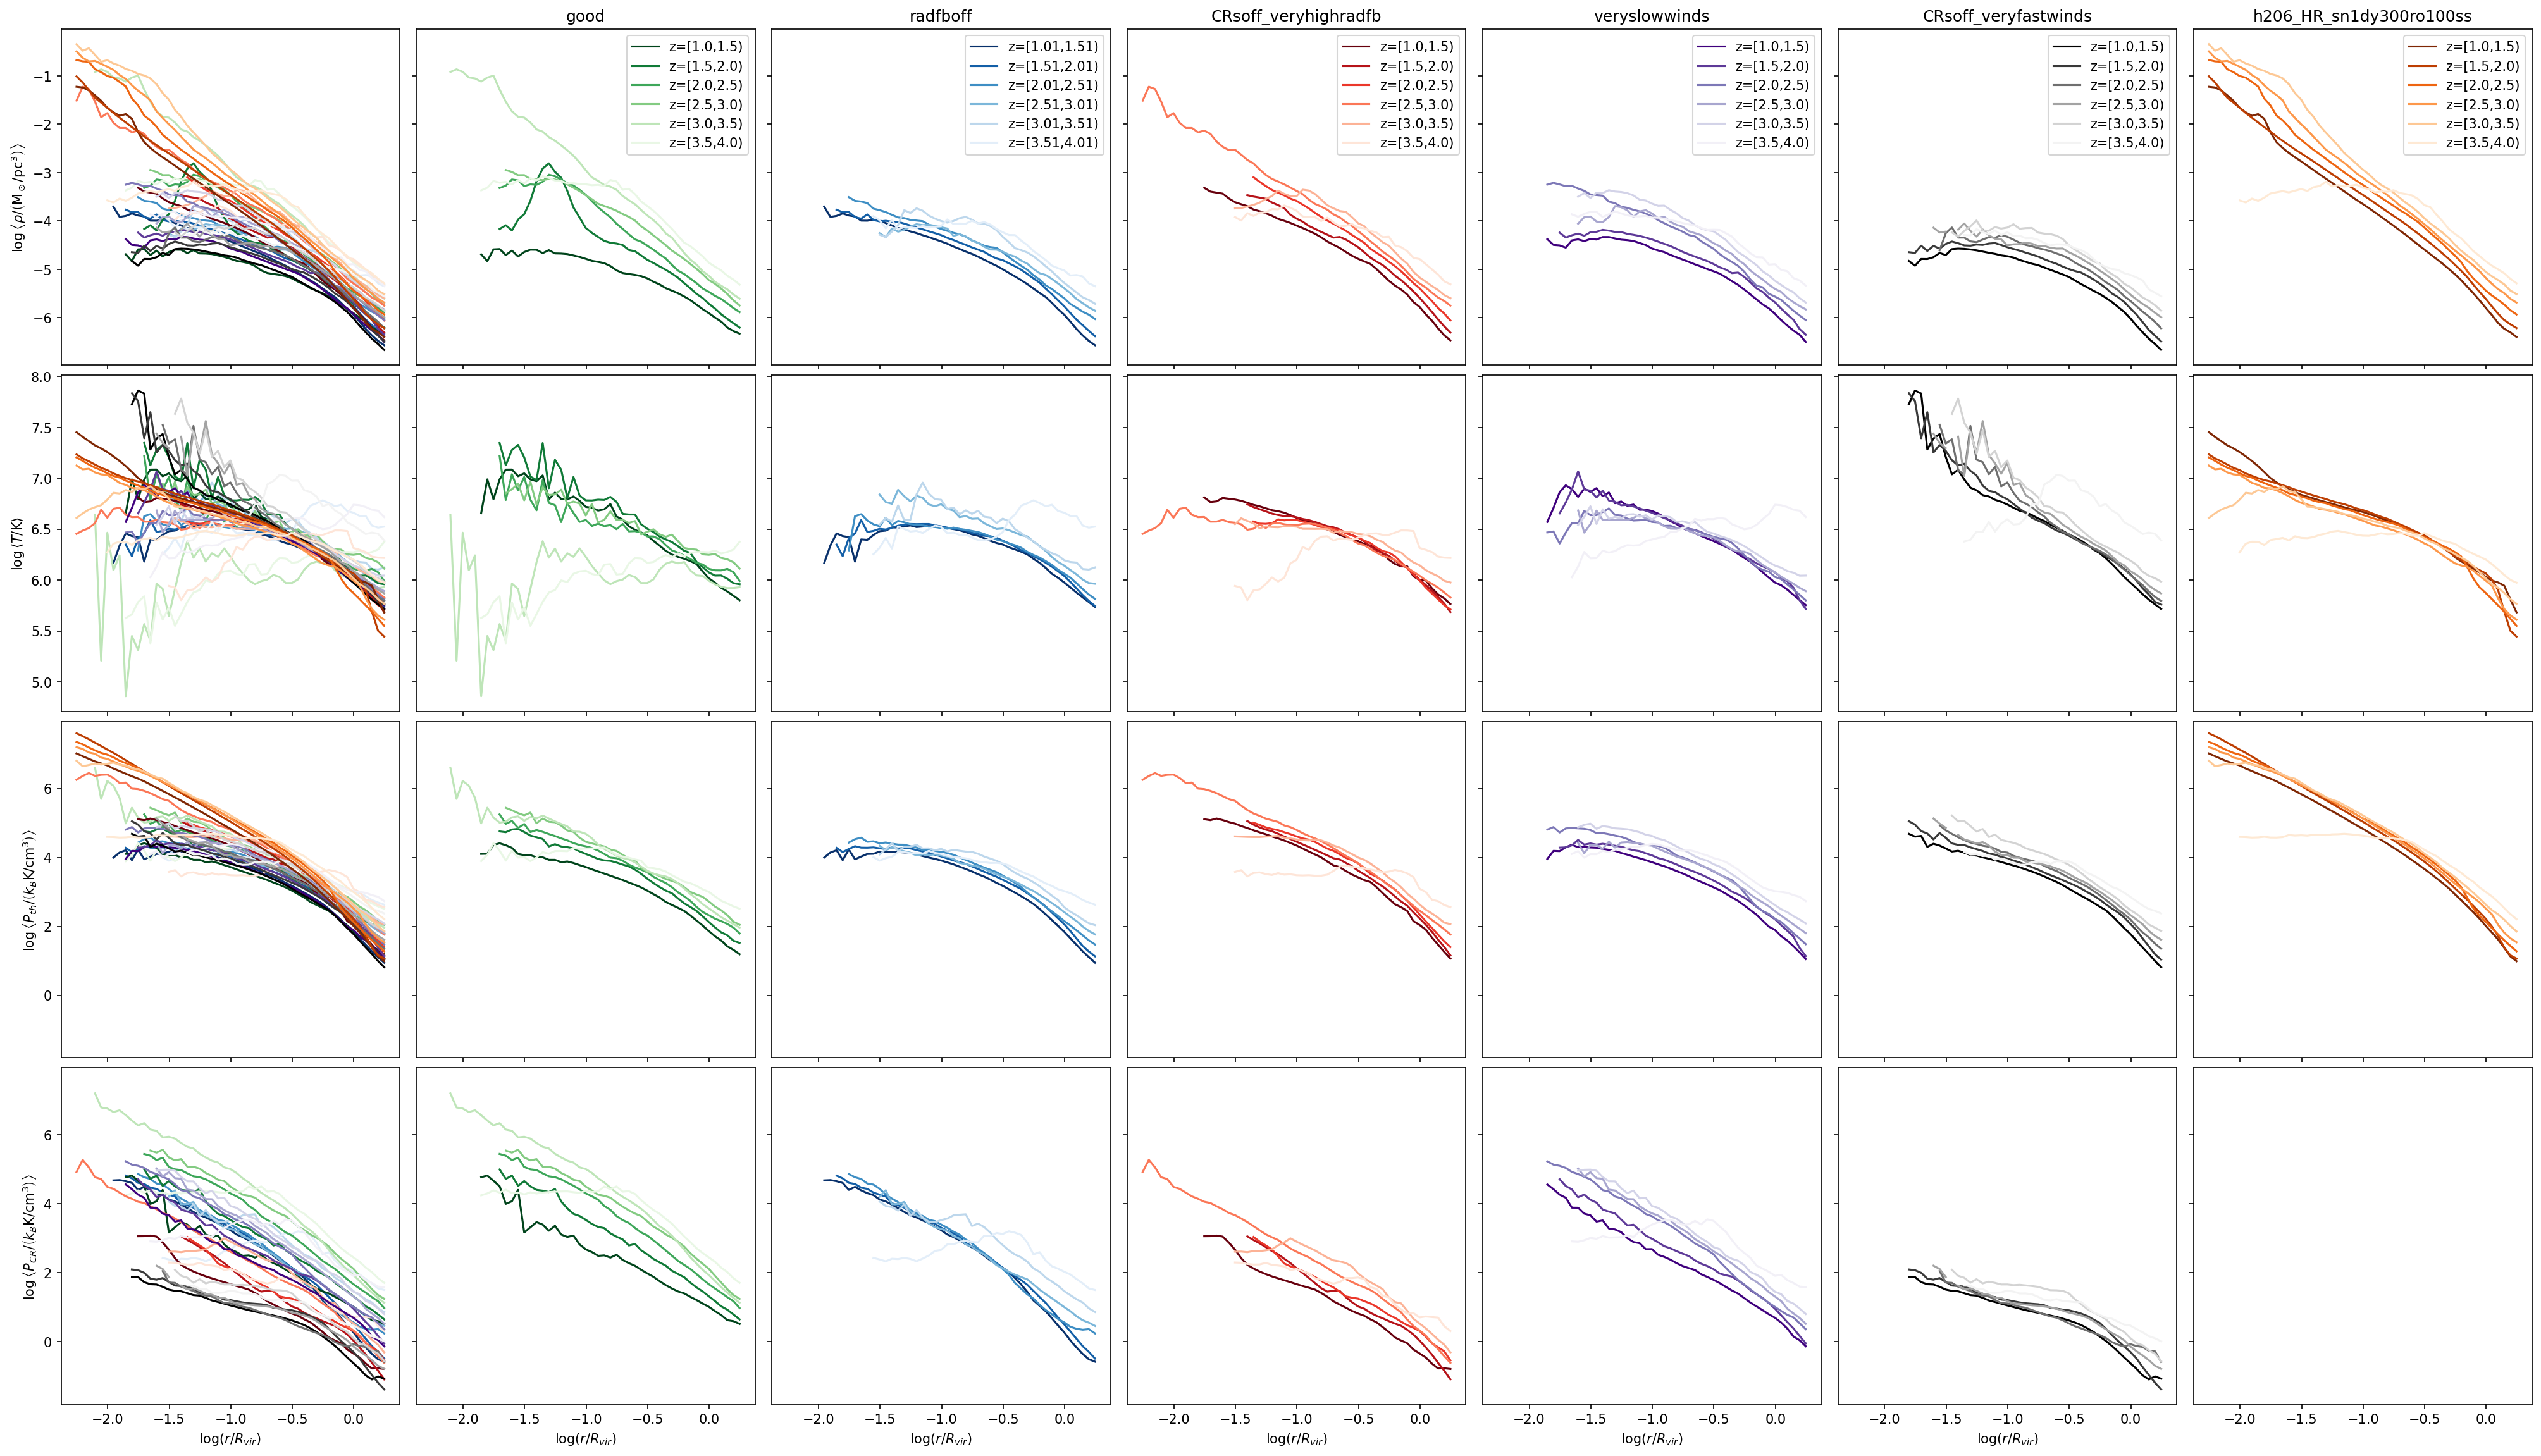

In [26]:
fig, axes = plt.subplots(4, 7, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.03}, figsize=[4.8*7,4.8*4], dpi=150)
cmaps = {'radfboff':plt.cm.Blues, 'good':plt.cm.Greens, 'CRsoff_veryhighradfb':plt.cm.Reds, 'veryslowwinds':plt.cm.Purples, 'CRsoff_veryfastwinds':plt.cm.Greys, 'h206_HR_sn1dy300ro100ss':plt.cm.Oranges}
indices = {'radfboff':1, 'good':0, 'CRsoff_veryhighradfb':2, 'veryslowwinds':3, 'CRsoff_veryfastwinds':4}
#names = {'radfboff':'Radiative feedback off', 'good':'Good model', 'CRsoff_veryhighradfb':'', 'veryslowwinds':3, 'CRsoff_veryfastwinds':4}

for model, simdir in Frontera_sims['push']['h206'].items():
    if model=='CRsoff':
        continue
    simname = path.basename(simdir)
    print(f'\nComputing sim {simname}.')
    i = indices[model]
    
    # Load profiles for all snapshots in each redshift bin
    allprofiles = loadpickle(f'data/{simname}_allprofiles_widezbins.pkl')['allprofiles']
    
    # For each redshift bin, plot median rho, T, P_thermal, and e_CR profiles
    plot_profiles_zbins(allprofiles, axes[0,0], cmap=cmaps[model], ylabel=True)
    plot_profiles_zbins(allprofiles, axes[0,i+1], cmap=cmaps[model])

    plot_profiles_zbins(allprofiles, axes[1,0], 'T lin', cmap=cmaps[model], ylabel=True)
    plot_profiles_zbins(allprofiles, axes[1,i+1], 'T lin', cmap=cmaps[model])

    plot_profiles_zbins(allprofiles, axes[2,0], 'P_th lin', cmap=cmaps[model], ylabel=True)
    plot_profiles_zbins(allprofiles, axes[2,i+1], 'P_th lin', cmap=cmaps[model])

    plot_profiles_zbins(allprofiles, axes[3,0], 'P_CR lin', cmap=cmaps[model], ylabel=True, xlabel=True)
    plot_profiles_zbins(allprofiles, axes[3,i+1], 'P_CR lin', cmap=cmaps[model], xlabel=True)
    
    axes[0,i+1].legend()
    axes[0,i+1].set_title(model)

snapdir = Quest_sims['nofb']['h206']
simname = os.path.basename(snapdir)
print(f'\nStarting {simname}...')
allprofiles = loadpickle(f'data/{simname}_allprofiles_widezbins.pkl')['allprofiles']
i = 5
model = simname
# For each redshift bin, plot median rho, T, P_thermal, and e_CR profiles
plot_profiles_zbins(allprofiles, axes[0,0], cmap=cmaps[model], ylabel=True)
plot_profiles_zbins(allprofiles, axes[0,i+1], cmap=cmaps[model])

plot_profiles_zbins(allprofiles, axes[1,0], 'T lin', cmap=cmaps[model], ylabel=True)
plot_profiles_zbins(allprofiles, axes[1,i+1], 'T lin', cmap=cmaps[model])

plot_profiles_zbins(allprofiles, axes[2,0], 'P_th lin', cmap=cmaps[model], ylabel=True)
plot_profiles_zbins(allprofiles, axes[2,i+1], 'P_th lin', cmap=cmaps[model])

# plot_profiles_zbins(allprofiles, axes[3,0], 'P_CR lin', cmap=cmaps[model], ylabel=True, xlabel=True)
# plot_profiles_zbins(allprofiles, axes[3,i+1], 'P_CR lin', cmap=cmaps[model], xlabel=True)

axes[0,i+1].legend()
axes[0,i+1].set_title(model)

    
sync_lim(axes[2:4, 0], 'y')
# plt.savefig(f'Figures/rho_Tlin_Pthermallin_PCRlin_profile_{"h206_push_differentmodels"}_AGN_widezbins.pdf')


Computing sim m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1.

Computing sim m13h206_m3e5_push_alpha10_gacc30_accf1_vw100_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1.

Computing sim m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1e-4.

Computing sim m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-6_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom100.

Computing sim m13h206_m3e5_push_alpha10_gacc30_accf1_vw42500_cr1e-6_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1.

Starting h206_HR_sn1dy300ro100ss...


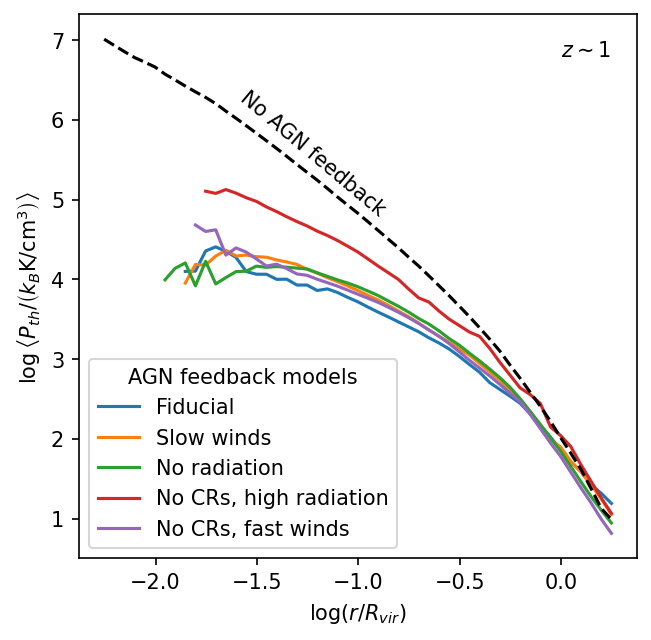

In [115]:
fig, axes = plt.subplots(1, 1, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.03}, figsize=[4.8*1,4.8*1], dpi=150)
cmaps = {'radfboff':plt.cm.Blues, 'good':plt.cm.Greens, 'CRsoff_veryhighradfb':plt.cm.Reds, 'veryslowwinds':plt.cm.Purples, 'CRsoff_veryfastwinds':plt.cm.Greys, 'h206_HR_sn1dy300ro100ss':plt.cm.Oranges}
pops = {'radfboff':'-', 'good':'-', 'CRsoff_veryhighradfb':'-', 'veryslowwinds':'-', 'CRsoff_veryfastwinds':'-', 'h206_HR_sn1dy300ro100ss':'--k'}
modelname = {'radfboff':'No radiation', 'good':'Fiducial', 'CRsoff_veryhighradfb':'No CRs, high radiation', 'veryslowwinds':'Slow winds', 'CRsoff_veryfastwinds':'No CRs, fast winds', 'h206_HR_sn1dy300ro100ss':''}

#names = {'radfboff':'Radiative feedback off', 'good':'Good model', 'CRsoff_veryhighradfb':'', 'veryslowwinds':3, 'CRsoff_veryfastwinds':4}

for model in ['good', 'veryslowwinds', 'radfboff', 'CRsoff_veryhighradfb', 'CRsoff_veryfastwinds']:
    simdir = Frontera_sims['push']['h206'][model]
    simname = path.basename(simdir)
    print(f'\nComputing sim {simname}.')
    
    # Load profiles for all snapshots in each redshift bin
    allprofiles = loadpickle(f'data/{simname}_allprofiles_widezbins.pkl')['allprofiles']
    
    # For each redshift bin, plot median rho, T, P_thermal, and e_CR profiles
    plot_profiles_zbins(allprofiles, axes, 'P_th lin', cmap=cmaps[model], ylabel=True, z0only=True, xlabel=True, model=modelname[model], pop=pops[model])
    
#     axes[0,i+1].legend()
#     axes[0,i+1].set_title(model)

snapdir = Quest_sims['nofb']['h206']
simname = os.path.basename(snapdir)
print(f'\nStarting {simname}...')
allprofiles = loadpickle(f'data/{simname}_allprofiles_widezbins.pkl')['allprofiles']
model = simname
# For each redshift bin, plot median rho, T, P_thermal, and e_CR profiles
plot_profiles_zbins(allprofiles, axes, 'P_th lin', cmap=cmaps[model], ylabel=True, z0only=True, model=modelname[model], pop=pops[model])

# axes[0,i+1].legend()
# axes[0,i+1].set_title(model)
plt.legend(title='AGN feedback models')
plt.text(0,6.8,'$z \sim 1$')
plt.text(-1.6,4.8,'No AGN feedback', rotation=-40)
plt.savefig(f'Figures/Pthermallin_profile_{"h206_push_differentmodels"}_firstwidezbin_NSF.png')